#The infamous O-ring

## Background

In 1986, the space shuttle Challenger exploded during take off, killing the seven astronauts aboard. It is believed that the explosion was caused by the failure of an O-ring (a rubber ring that seals parts of the solid fuel rockets together), and that the failure was caused by the cold weather at the time of launch (31F).

For a long time the failure of the O-ring was a very contentious and hotly debated topic, and it was not until the infamous court-room demonstration by Richard Feynman, who was able to tear apart an O-ring with his bare hands, that the failure due to cold weather was really taken seriously.

This afternoon, you are going to use real test data from NASA, along with your new Bayesian arsenal, to reach your own conclusion on what happened that fateful morning.

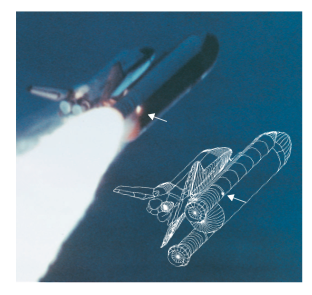

In [1]:
from IPython.display import Image
Image(filename='../data/shuttle.png')

## The data and assumptions

In the file <a href="../data/chall.txt">chall.txt</a>, you will find a table of temperature (in Fahrenheit) and failure data from 23 simulated shuttle launches, where 1 stands for O-ring failure and 0 no failure.  We assume that the observed temperatures are fixed and that, at temperature $t$, an O-ring fails with probability $f(\theta_{1}+\theta_{2}t)$ conditionally on $\Theta = (\theta_1, \theta_2)$.

Here, $f(z) = 1/(1 + \exp(-z))$ is the logistic function.

### Question 1
Based on your own common sense knowledge, suggest a prior distribution for the regression parameters ($\theta_1, \theta_2$), and explain your choice of prior.

###Question 2
Write a script that draws 50,000 samples of $\theta_1$ and $\theta_2$ from the posterior distribution of $\Theta$ using a Metropolis sampler.

###Question 3
Compute a Bayesian posterior probability for an O-ring failure at $t = 31F$.

# Solution

In [1]:
"""
Begin by importing the basic libraries.
Here are a couple to get you started...
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.random

###Question 1 Solution
Your choice of priors should be based on previous (common sense) knowledge, but not <i>specifically</i> take into account the data. This does not necessarily mean that you can't at least look at the data to give you a handwavey vague notion of what you are dealing with.

So begin by reading in the data and plotting it:

(-0.1, 1.1)

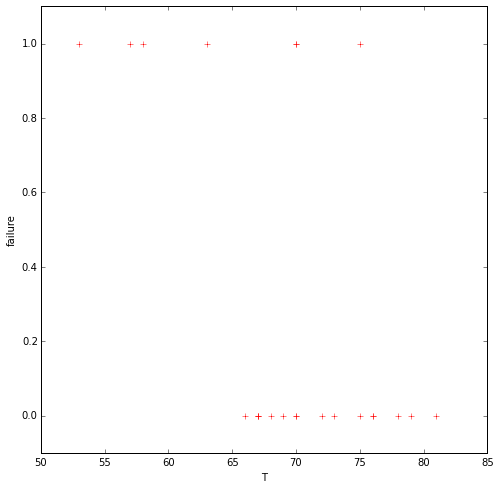

In [12]:
"""
Read in the data from chall.txt
Plot the data
"""

### Your code here ###

datafile = np.loadtxt("../data/chall.txt")

temp = datafile[:,0]
fail = datafile[:,1]

plt.figure(1, figsize=(8,8))
plt.clf()
plt.hold(True)
plt.plot(temp, fail, 'r+')
plt.xlabel("T")
plt.ylabel("failure")
plt.ylim(-0.1,1.1)




Next, you should define a new function, you could for instance call it "logit_func", and define the logistic function as outlined in the question. Play around with a few specific values for the regression parameters, and overplot them onto the data figure.

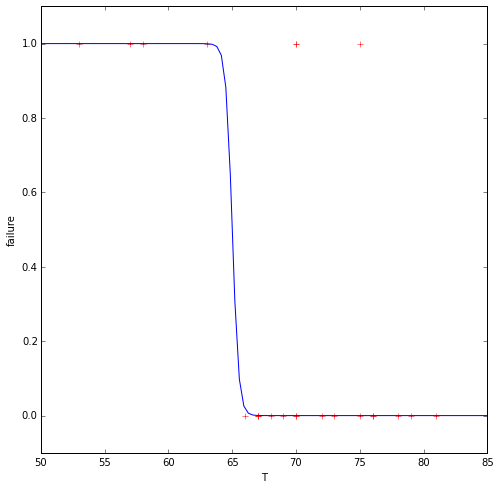

In [18]:
def logit_func(theta1, theta2, t_in):
    """
    Define the logistic function and it's input params
    """
    
    z = theta1 + theta2*t_in
    out = 1./(1. + np.exp(-z))
    
    return out
    

## Now overplot the logit_func onto your figure of the data
theta1 = 260.0
theta2 = -4.0

tnew = np.linspace(50, 85, num = 100)
logit_test = logit_func(theta1, theta2, tnew)

plt.figure(1, figsize=(8,8))
plt.clf()
plt.hold(True)
plt.plot(temp, fail, 'r+')
plt.xlabel("T")
plt.ylabel("failure")
plt.ylim(-0.1,1.1)

plt.plot(tnew, logit_test,'b-')






Now that you have some intuition towards the logistic function and how it relates to the data you've been given. Decide on your priors for the regression parameters, explain your choice of specific distribution and plot them

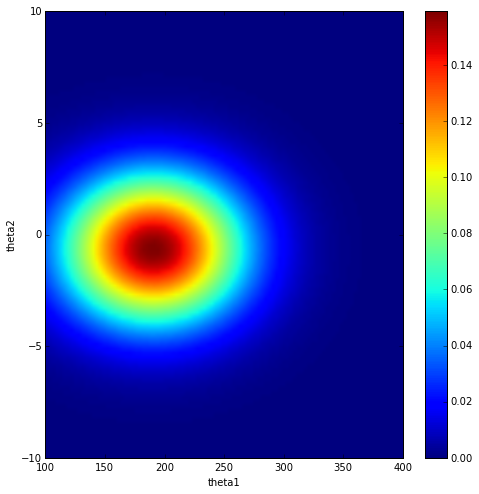

In [9]:
"""
Explain your choice of priors
Plot the regression parameter priors


We choose normal distribution because thats what everybody does.
we choose a big standard deviation to cover more parameter space.
"""

def prior_func(theta1, theta2):
    sigma1 = 50.0
    sigma2 = 5.0
    
    part1 = 1./np.sqrt(2.0*np.pi)*np.exp(-(theta1 - 260.0)**2/sigma1**2)
    part2 = 1./np.sqrt(2.0*np.pi)*np.exp(-(theta2 + 4.0)**2/sigma2**2)
    output = part1*part2
    
    return output
    
    
### Your code here
theta1l = np.linspace(100., 400., num = 100)
theta2l = np.linspace(-10, 10, num = 100)

prior_mat = np.zeros((len(theta1l), len(theta2l)))

for i in range(0, len(theta1l)):
    for j in range(0, len(theta2l)):
        new_prior = prior_func(theta1l[i], theta2l[j])
        prior_mat[i, j] = new_prior
          

plt.figure(2, figsize = (8,8))
plt.clf()
plt.hold(True)
plt.imshow(prior_mat, extent = [theta1l[0], theta1l[-1], theta2l[0], theta2l[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('theta1')
plt.ylabel('theta2')



In [10]:
def mylikelihood(theta1, theta2, temperature, failures):
    predictedz = theta1 + theta2*temperature
    predictedfail = 1.0/(1.0 + np.exp(-predictedz))
    
    likelihdlist = 1.0/np.sqrt(2.0*np.pi)*np.exp(-(predictedfail - failures)**2/2.0)
    likelihd = likelihdlist.prod()
    
    return likelihd



In [13]:
theta1 = 314.0
theta2 = -5.2

while(True):
    
    current_pos = mylikelihood(theta1, theta2, temp, fail)*prior_func(theta1, theta2)

    newang = np.random.rand()*2.0*np.pi
    
    inc_theta1 = np.cos(newang)
    inc_theta2 = np.sin(newang)
    
    new_theta1 = theta1 + inc_theta1
    new_theta2 = theta2 + inc_theta2
    
    new_pos = mylikelihood(new_theta1, new_theta2, temp, fail)*prior_func(new_theta1, new_theta2)
    
    newu = np.random.rand()
    
    if newu < np.min([1.0, new_pos/current_pos]):
        theta1 = new_theta1
        theta2 = new_theta2
    else:
        theta1 = theta1
        theta2 = theta2
        
    
    break

4.19359778875e-12
